In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data_cleaned.csv', index_col=0)

In [3]:
df.head()

,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,coverage,claim_id,amount,risk_tier,holdout
0,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.0,0.0,1,Additional Living Expense,0,0.0,2,0
1,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.0,0.0,1,Guest Medical,0,0.0,2,0
2,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.0,0.0,1,Liability,0,0.0,2,0
3,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.0,0.0,1,Personal Property,0,0.0,2,0
4,2,"Reddy, Dawna",3,Science,0.609616,0,0,0.0,1.0,1,Additional Living Expense,0,0.0,2,0


In [4]:
df_non_zero_amount = df[df['amount'] != 0]
df_non_zero_amount

,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,coverage,claim_id,amount,risk_tier,holdout
40,11,"Leigh, Shelley",2,Other,0.981003,0,1,10.083255,1.0,1,Personal Property,1,990.596391,1,0
84,22,"Stark, Najee",4,Science,1.874571,1,0,0.000000,0.0,1,Personal Property,2,1172.942616,3,0
104,27,"Roy, Dylan",2,Business,2.582975,1,0,0.000000,0.0,1,Personal Property,3,2106.469682,1,0
112,29,"Mora, Yesica",4,Business,2.448340,0,1,0.568290,1.0,1,Liability,4,6943.265254,3,0
128,33,"Ignacio, Austin",4,Business,2.843812,0,0,0.000000,NaN,1,Guest Medical,5,7197.105825,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39982,9979,"Asad, Charles",2,Humanities,2.157876,1,1,0.091956,0.0,1,Personal Property,1815,1037.924600,1,1
40018,9988,"Corral, Gregorio",1,Science,1.428422,1,0,0.000000,0.0,1,Additional Living Expense,1816,4994.989128,1,0
40019,9988,"Corral, Gregorio",1,Science,1.428422,1,0,0.000000,0.0,1,Additional Living Expense,1817,4040.891836,1,0
40035,9992,"el-Naderi, Uthmaa N",4,Other,3.179212,0,1,1.279512,0.0,1,Personal Property,1818,940.165334,3,0


In [5]:
print(df_non_zero_amount[df_non_zero_amount['coverage'] == 'Personal Property'].shape[0])
print(df_non_zero_amount[df_non_zero_amount['coverage'] == 'Liability'].shape[0])
print(df_non_zero_amount[df_non_zero_amount['coverage'] == 'Guest Medical'].shape[0])
print(df_non_zero_amount[df_non_zero_amount['coverage'] == 'Additional Living Expense'].shape[0])

973
85
233
528


In [6]:
coverage_sum = df_non_zero_amount.groupby('coverage')['amount'].sum()
print(coverage_sum)

coverage
Additional Living Expense    2.911317e+06
Guest Medical                3.870552e+06
Liability                    7.374108e+05
Personal Property            9.954600e+05
Name: amount, dtype: float64


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

student_id               0
name                     0
class                    0
study                    0
gpa                      0
is_greek                 0
is_on_campus             0
distance_to_campus       0
is_female             3936
is_sprinklered           0
coverage                 0
claim_id                 0
amount                   0
risk_tier                0
holdout                  0
dtype: int64


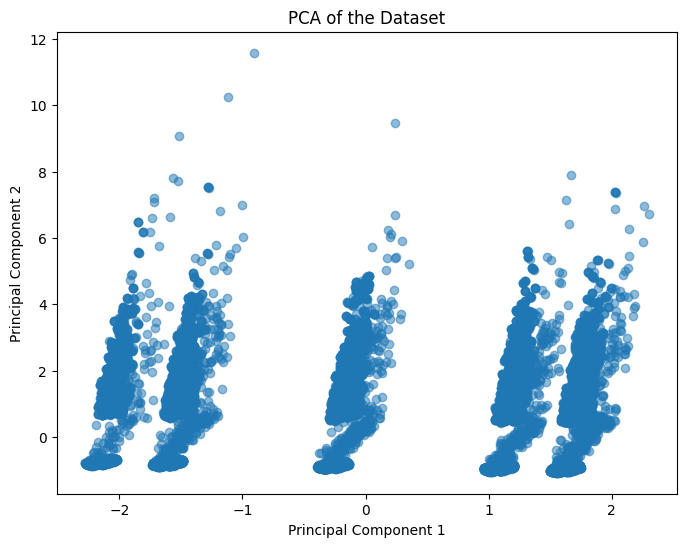

Principal Component 1 variables:
student_id            0.033336
class                -0.704930
gpa                   0.007861
is_greek              0.034548
is_on_campus          0.037405
distance_to_campus    0.031083
is_female             0.000183
is_sprinklered        0.014581
claim_id              0.033852
amount                0.007011
risk_tier            -0.704931
holdout               0.002609
dtype: float64

Principal Component 2 variables:
student_id            0.038826
class                 0.039612
gpa                  -0.005553
is_greek              0.006162
is_on_campus          0.685581
distance_to_campus    0.683518
is_female             0.019976
is_sprinklered       -0.009892
claim_id              0.162239
amount                0.176883
risk_tier             0.038303
holdout              -0.007943
dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric columns for PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols].dropna())

# Apply PCA
pca = PCA(n_components=2)  # Let's reduce to 2 components for visualization
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.show()

# Add variable names for principal components
pc1_vars = pd.Series(pca.components_[0], index=numeric_cols)
pc2_vars = pd.Series(pca.components_[1], index=numeric_cols)

print("Principal Component 1 variables:")
print(pc1_vars)
print("\nPrincipal Component 2 variables:")
print(pc2_vars)

In [9]:
personal_property_df = df[df['coverage'] == 'Personal Property']
personal_property_df

,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,coverage,claim_id,amount,risk_tier,holdout
3,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.000000,0.0,1,Personal Property,0,0.0,2,0
7,2,"Reddy, Dawna",3,Science,0.609616,0,0,0.000000,1.0,1,Personal Property,0,0.0,2,0
11,3,"Rivera, Johnna",3,Business,3.073385,0,1,0.223942,1.0,0,Personal Property,0,0.0,2,0
15,4,"al-Jamil, Umaira",4,Business,3.224736,0,0,0.000000,0.0,0,Personal Property,0,0.0,3,0
19,5,"el-Mohammed, Qutb",2,Business,2.687851,0,0,0.000000,1.0,0,Personal Property,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,9996,"al-Mannan, Majdi",5,Other,0.951238,0,1,10.200774,0.0,0,Personal Property,0,0.0,3,0
40058,9997,"Bislimi, Georgia",1,Humanities,3.587587,1,1,0.844743,0.0,1,Personal Property,0,0.0,1,0
40062,9998,"Cheng, Thanh",2,Other,1.860945,0,0,0.000000,0.0,0,Personal Property,0,0.0,1,0
40066,9999,"Duncan, Justin",1,Business,2.508244,1,0,0.000000,1.0,1,Personal Property,0,0.0,1,0


In [10]:
personal_property_df = personal_property_df.drop(columns=['coverage'])
personal_property_df.head()

,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout
3,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0
7,2,"Reddy, Dawna",3,Science,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0
11,3,"Rivera, Johnna",3,Business,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0
15,4,"al-Jamil, Umaira",4,Business,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0
19,5,"el-Mohammed, Qutb",2,Business,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0


In [11]:
personal_property_df.to_csv('data/data_cleaned_PersonalProperty.csv')